In [1]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
songs = pd.read_csv('/content/songs.csv')

In [3]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [4]:
songs.shape

(84497, 7)

In [5]:
songs= songs.sample(frac=0.1)

In [6]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8450 entries, 18759 to 9164
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song_id      8450 non-null   object 
 1   song_length  8450 non-null   int64  
 2   genre_ids    8279 non-null   object 
 3   artist_name  8450 non-null   object 
 4   composer     4875 non-null   object 
 5   lyricist     2332 non-null   object 
 6   language     8450 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 528.1+ KB


In [7]:
for i in songs.select_dtypes(include=['object']).columns:
    songs[i][songs[i].isnull()] = 'unknown'
songs = songs.fillna(value=0)

In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8450 entries, 18759 to 9164
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song_id      8450 non-null   object 
 1   song_length  8450 non-null   int64  
 2   genre_ids    8450 non-null   object 
 3   artist_name  8450 non-null   object 
 4   composer     8450 non-null   object 
 5   lyricist     8450 non-null   object 
 6   language     8450 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 528.1+ KB


In [9]:
songs.corr()

,song_length,language
song_length,1.000000,-0.134711
language,-0.134711,1.000000


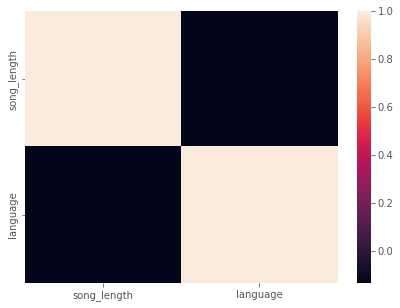

In [10]:
plt.figure(figsize=[7,5])
sns.heatmap(songs.corr())
plt.show()